In [1]:
import numpy as np
import scipy.sparse as sp
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
norm = np.load("./norm.npy")

In [5]:
norm.max()

2530.0

In [5]:
adj = (np.load("metr_adj_matrix.npz")["arr_0"].astype(np.float32))

In [9]:
def dummy(n_nodes, adj):
    nodes = np.array([np.random.randint(n_nodes), 26, 44])

    while len(nodes) < 128:
        neighbours = np.array([], dtype=np.int32)
        for e in nodes:
            neighbours = np.union1d(neighbours, np.nonzero(adj[e])[0])

        nodes = np.union1d(
            nodes,
            np.random.choice(
                neighbours, len(neighbours) // 2, replace=False
            ),
        )

    return np.array(nodes)[: 128].astype(np.int32)

In [10]:
node_probab = np.zeros(207)
edge_probab = np.zeros([207, 207])
for e in tqdm(np.arange(5000)):
    nodes = dummy(207, adj)
    node_probab[nodes] += 1
    edge_probab[nodes[:, None], nodes] += 1    

  0%|          | 0/5000 [00:00<?, ?it/s]

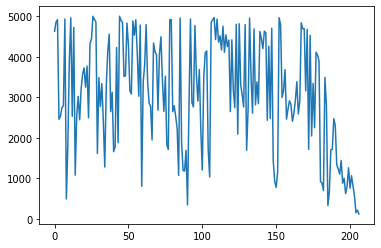

In [11]:
plt.plot(node_probab)

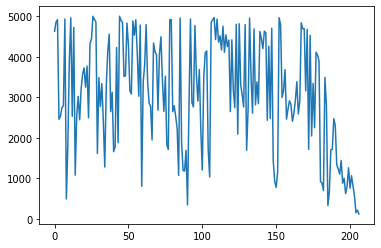

In [12]:
plt.plot(node_probab)

In [13]:
edge_norm = edge_probab/node_probab[None, :]

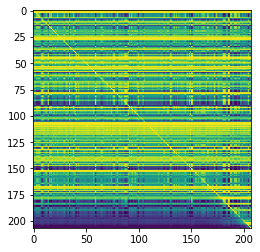

In [14]:
plt.imshow(edge_probab/node_probab[None, :])

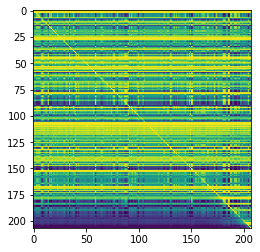

In [17]:
plt.imshow(edge_probab/node_probab[None, :])

In [33]:
stuff = node_probab[None, :]/edge_probab

<ipython-input-33-16d85bd086c7>:1: RuntimeWarning: divide by zero encountered in true_divide
  stuff = node_probab[None, :]/edge_probab


In [40]:
stuff[np.isinf(stuff)] = 0.1
stuff[np.isnan(stuff)] = 0.1

In [3]:
def calculate_random_walk_matrix(adj_mx):
    d = np.array(adj_mx.sum(1))
    d_inv = np.power(d, -0.5).flatten()
    d_inv[np.isinf(d_inv)] = 0.0
    d_mat_inv = np.diag(d_inv)

    return adj_mx.dot(d_mat_inv).T.dot(d_mat_inv)

In [7]:
adjacency_matrix = calculate_random_walk_matrix(adj)
adjacency_matrix1 = (
    adjacency_matrix.dot(adjacency_matrix)
    .dot(adjacency_matrix)
    .dot(adjacency_matrix)
)

In [9]:
np.min(adjacency_matrix), np.max(adjacency_matrix)

(0.0, 1.0)

In [11]:
np.min(adjacency_matrix1), np.max(adjacency_matrix1)

(0.0, 1.1102613)

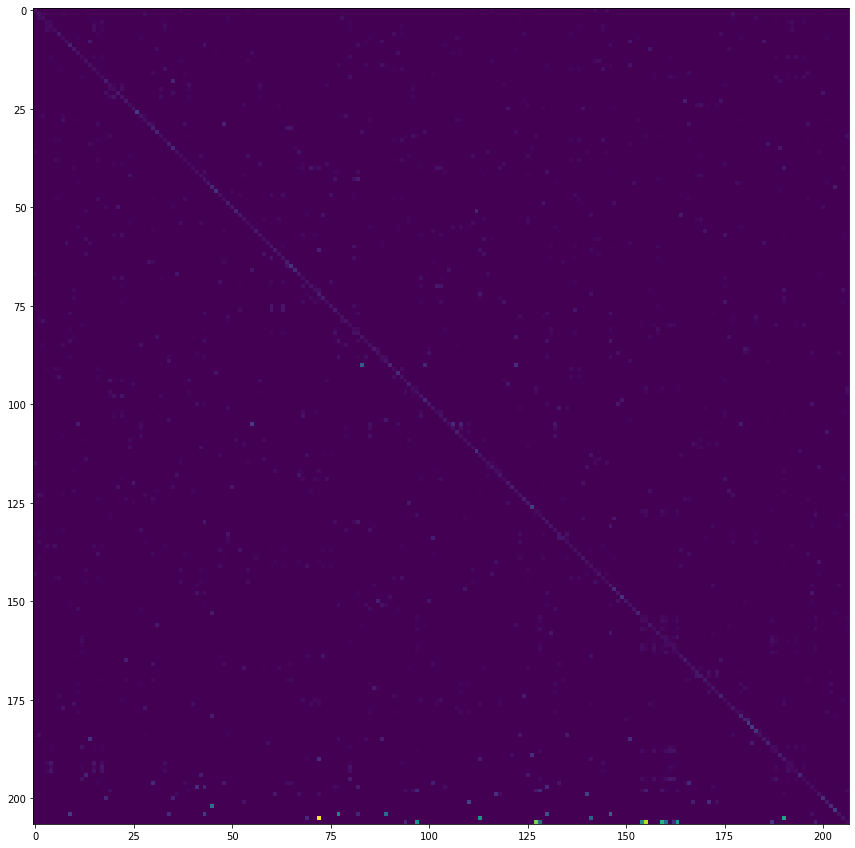

In [83]:
plt.figure(figsize=(15, 15))
plt.imshow(np.abs(adj_nrm2))

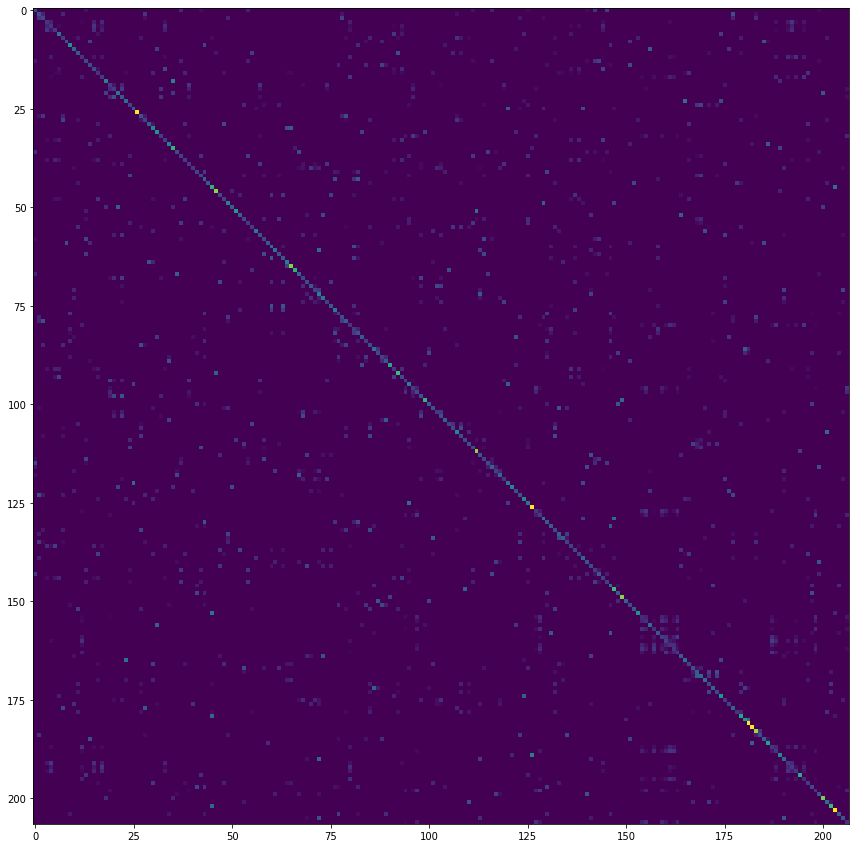

In [84]:
plt.figure(figsize=(15, 15))
plt.imshow(np.abs(adj_nrm1))

In [94]:
stuff = np.zeros(207)

In [95]:
stuff[nodes] = 1

In [96]:
np.nonzero(stuff==0)

(array([], dtype=int64),)

In [81]:
adj = (adj > 0)

In [10]:
prob = np.sum(adj, axis=-1)
prob /= np.sum(prob)

In [11]:
edges_collected = np.zeros([207, 207], dtype=np.int64)
nodes_collected = np.zeros([207], dtype=np.int64)

In [12]:
for e in tqdm(np.arange(500)):
    u = np.unique(np.random.multinomial(1, prob, 128).argmax(-1))
    edges_collected[u[:,None], u] += 1
    nodes_collected[u] += 1

  0%|          | 0/500 [00:00<?, ?it/s]

In [13]:
stuff = edges_collected/nodes_collected[:, None]

In [40]:
stuff = 500/ stuff / 207

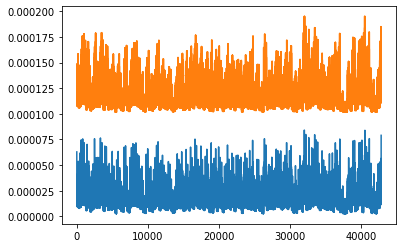

In [28]:
plt.plot(edges_collected.reshape([-1])/np.sum(edges_collected))
plt.plot(prob[:, None].dot(prob[None, :]).reshape([-1]) + 0.0001)

In [139]:
s

2.8985347511179974e-07

In [29]:
ep = np.array([prob for _ in range(207)])

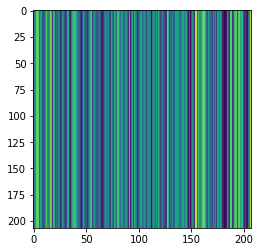

In [41]:
plt.imshow(ep)

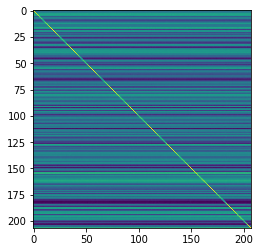

In [42]:
plt.imshow(edges_collected/nodes_collected[None, ])

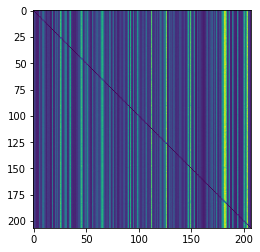

In [43]:
plt.imshow(stuff)

In [45]:
stuff.max()

18.06792831922469

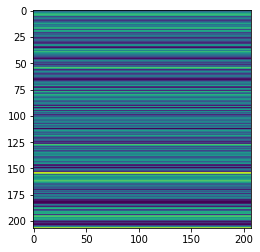

In [149]:
plt.imshow()

In [46]:
s = np.random.randint(0, 200, [6, 6])

In [ ]:
%%cython -a
import numpy as np
cimport numpy as np
cimport cython
from cython.parallel import prange,parallel
from libcpp.map cimport map
from libcpp.unordered_map cimport unordered_map
from libcpp.vector cimport vector
from libcpp.string cimport string
from cython.operator cimport dereference, preincrement

 
cdef int num_proc_view=2
cpdef float [:] data_view=
prob = np.sum(data_view, axis=-1)
prob /= np.sum(prob)
cdef int length=data_view.shape[0]
cdef int [:] edge_index_view=np.arange(207)
cdef float [:] norm_aggr_view=prob[:, None].dot(prob[None])
cdef int i
for i in prange(length,schedule='static',nogil=True,num_threads=num_proc_view):
    data_view[i]=norm_aggr_view[edge_index_view[i]]
print(data_view)

In [19]:
data_view

NameError: name 'data_view' is not defined

In [2]:
%load_ext cython